In [1]:
%load_ext autoreload
import datetime
# import ete3
import json
# import matplotlib.pyplot as plt
# import networkx as nx
import numpy as np
import pandas as pd
# import re
import xml.etree.ElementTree as ET
# import xml.dom.minidom
import xmlschema

In [41]:
%autoreload
from maxes.xes_loader2 import XesLoader, XesLog
# from maxes.xes_file import XesFile
from maxes.analyze_xes import AnalyzeXes
# import maxes.analyze_sequence
# import maxes.serialization.serialize
# import maxes.graphs
import maxes.utils

In [3]:
maxes.utils.setup_notebook_logging() # RUN ONLY ONCE

In [4]:
class CustomJsonEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        if isinstance(obj, np.floating):
            return float(obj)
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        if isinstance(obj, pd.Timestamp):
            return str(obj)
        if isinstance(obj, pd.Timedelta):
            return str(obj)
        return super(CustomJsonEncoder, self).default(obj)

In [ ]:
files = [
    # "/vt/md/maxes/maxes/data/Activities of daily living of several individuals_1_all/data/activitylog_uci_detailed_labour.xes/activitylog_uci_detailed_labour.xes",
    # "/vt/md/maxes/maxes/data/Activities of daily living of several individuals_1_all/data/activitylog_uci_detailed_weekends.xes/activitylog_uci_detailed_weekends.xes",
    # "/vt/md/maxes/maxes/data/Activities of daily living of several individuals_1_all/data/edited_hh102_labour.xes/edited_hh102_labour.xes",
    # "/vt/md/maxes/maxes/data/Activities of daily living of several individuals_1_all/data/edited_hh102_weekends.xes/edited_hh102_weekends.xes",
    # "/vt/md/maxes/maxes/data/Activities of daily living of several individuals_1_all/data/edited_hh104_labour.xes/edited_hh104_labour.xes",
    # "/vt/md/maxes/maxes/data/Activities of daily living of several individuals_1_all/data/edited_hh104_weekends.xes/edited_hh104_weekends.xes",
    # "/vt/md/maxes/maxes/data/Activities of daily living of several individuals_1_all/data/edited_hh110_labour.xes/edited_hh110_labour.xes",
    # "/vt/md/maxes/maxes/data/Activities of daily living of several individuals_1_all/data/edited_hh110_weekends.xes/edited_hh110_weekends.xes",
    # "/vt/md/maxes/maxes/data/Apache Commons Crypto 1.0.0 - Stream CbcNopad Unit Test Software Event Log_1_all/data/ApacheCommons-Crypto-1.0.0-StreamCbcNopad-single-trace.xes/ApacheCommons-Crypto-1.0.0-StreamCbcNopad-single-trace.xes",
    # "/vt/md/maxes/maxes/data/Apache Commons Crypto 1.0.0 - Stream CbcNopad Unit Test Software Event Log_1_all/data/ApacheCommons-Crypto-1.0.0-StreamCbcNopad-splitted.xes/ApacheCommons-Crypto-1.0.0-StreamCbcNopad-splitted.xes",
    # "/vt/md/maxes/maxes/data/BPI Challenge 2012_1_all/BPI_Challenge_2012.xes/BPI_Challenge_2012.xes",
    # "/vt/md/maxes/maxes/data/BPI Challenge 2013, closed problems_1_all/BPI_Challenge_2013_closed_problems.xes/BPI_Challenge_2013_closed_problems.xes",
    # "/vt/md/maxes/maxes/data/BPI Challenge 2013, incidents_1_all/BPI_Challenge_2013_incidents.xes/BPI_Challenge_2013_incidents.xes",
    # "/vt/md/maxes/maxes/data/BPI Challenge 2013, open problems_1_all/BPI_Challenge_2013_open_problems.xes/BPI_Challenge_2013_open_problems.xes",
    # "/vt/md/maxes/maxes/data/BPI Challenge 2015 Municipality 1_1_all/BPIC15_1.xes",
    # "/vt/md/maxes/maxes/data/BPI Challenge 2015 Municipality 2_1_all/BPIC15_2.xes",

    "/vt/md/maxes/maxes/data/BPI Challenge 2015 Municipality 3_1_all/BPIC15_3.xes",
    # "/vt/md/maxes/maxes/data/BPI Challenge 2015 Municipality 4_1_all/BPIC15_4.xes",
    # "/vt/md/maxes/maxes/data/BPI Challenge 2015 Municipality 5_1_all/BPIC15_5.xes",
    # "/vt/md/maxes/maxes/data/BPI Challenge 2017_1_all/BPI Challenge 2017.xes/BPI Challenge 2017.xes",
    # "/vt/md/maxes/maxes/data/BPI Challenge 2018_1_all/BPI Challenge 2018.xes/BPI Challenge 2018.xes",

    # "/vt/md/maxes/maxes/data/Conformance Checking Challenge 2019 (CCC19)_1_all/data/CCC19 - Log XES.xes",
    # "/vt/md/maxes/maxes/data/Hospital Billing - Event Log_1_all/Hospital Billing - Event Log.xes/Hospital Billing - Event Log.xes",
    # "/vt/md/maxes/maxes/data/JUnit 4.12 Software Event Log_1_all/JUnit 4.12 Software Event Log.xes/JUnit 4.12 Software Event Log.xes",
    # "/vt/md/maxes/maxes/data/NASA Crew Exploration Vehicle (CEV) Software Event Log_1_all/data/nasa-cev-1-10-single-trace.xes/nasa-cev-1-10-single-trace.xes",
    # "/vt/md/maxes/maxes/data/NASA Crew Exploration Vehicle (CEV) Software Event Log_1_all/data/nasa-cev-1-10-splitted.xes/nasa-cev-1-10-splitted.xes",
    # "/vt/md/maxes/maxes/data/NASA Crew Exploration Vehicle (CEV) Software Event Log_1_all/data/nasa-cev-complete-single-trace.xes/nasa-cev-complete-single-trace.xes",
    # "/vt/md/maxes/maxes/data/NASA Crew Exploration Vehicle (CEV) Software Event Log_1_all/data/nasa-cev-complete-splitted.xes/nasa-cev-complete-splitted.xes",
    # "/vt/md/maxes/maxes/data/Real-life event logs - Hospital log_1_all/Hospital_log.xes/Hospital_log.xes",
    # "/vt/md/maxes/maxes/data/Road Traffic Fine Management Process_1_all/Road_Traffic_Fine_Management_Process.xes/Road_Traffic_Fine_Management_Process.xes",
    # "/vt/md/maxes/maxes/data/Sepsis Cases - Event Log_1_all/Sepsis Cases - Event Log.xes/Sepsis Cases - Event Log.xes",
    # "/vt/md/maxes/maxes/data/Statechart Workbench and Alignments Software Event Log_1_all/data/Statechart Workbench and Alignments Software Event Log.xes/Statechart Workbench and Alignments Software Event Log.xes"
]

json_file_path = "/vt/md/maxes/maxes/output/xes_analysis.json"


In [67]:
analyzer = None
for file in files:
    try:
        analyzer = AnalyzeXes()
        xes_info = analyzer.analyze(file)

        info = []
        with open(json_file_path, "r", encoding="utf-8") as f:
            info = json.load(f)
        with open(json_file_path, "w", encoding="utf-8") as f:
            info.append(xes_info)
            json.dump(info, f, ensure_ascii=False, indent=4, cls=CustomJsonEncoder)
    except RuntimeError as e:
        print("received error")
        print(e)

# info

In [40]:
# <string key="Activity code" value="339486E"/>

# set(el.tag for el in analyzer.xes_loader.tree.findall(".//*[@value='339486E']"))
analyzer.xes_loader._event_attribute_types_stats
# analyzer.xes_loader._event_attribute_type_map

defaultdict(<function maxes.xes_loader2.XesLoader._collect_attribute_types.<locals>.<lambda>()>,
            {'org:group': defaultdict(<function maxes.xes_loader2.XesLoader._collect_attribute_types.<locals>.<lambda>.<locals>.<lambda>()>,
                         {'string': 150275}),
             'Number of executions': defaultdict(<function maxes.xes_loader2.XesLoader._collect_attribute_types.<locals>.<lambda>.<locals>.<lambda>()>,
                         {'int': 150291}),
             'Specialism code': defaultdict(<function maxes.xes_loader2.XesLoader._collect_attribute_types.<locals>.<lambda>.<locals>.<lambda>()>,
                         {'int': 150291}),
             'concept:name': defaultdict(<function maxes.xes_loader2.XesLoader._collect_attribute_types.<locals>.<lambda>.<locals>.<lambda>()>,
                         {'string': 150291}),
             'Producer code': defaultdict(<function maxes.xes_loader2.XesLoader._collect_attribute_types.<locals>.<lambda>.<locals>.<lambda>(

In [ ]:
analyzer = AnalyzeXes(
    check_xml_schema_xes_2014=False,
    check_xml_schema_xes_2023=False,
    check_xml_schema_xes_2023_extended=False,
)

# file = "/vt/md/maxes/maxes/data/Activities of daily living of several individuals_1_all/data/activitylog_uci_detailed_labour.xes/activitylog_uci_detailed_labour.xes"
file = "/vt/md/maxes/maxes/data/Hospital Billing - Event Log_1_all/Hospital Billing - Event Log.xes/Hospital Billing - Event Log.xes"
xes_info = analyzer.analyze(file)
# xes_info

# analyzer._event_attributes_counts
# analyzer._calculate_event_attributes_counts()

In [11]:
# analyzer._calculate_event_attributes_counts()
# events = analyzer.xml_tree.findall(f"./{{http://www.xes-standard.org}}trace/{{http://www.xes-standard.org}}event")
events = analyzer.xml_tree.findall(f"./trace/event")
len(events)

451359

In [ ]:
analyzer1 = AnalyzeXes(
    check_xml_schema_xes_2014=False,
    check_xml_schema_xes_2023=False,
    check_xml_schema_xes_2023_extended=False,
)

analyzer2 = AnalyzeXes(
    check_xml_schema_xes_2014=False,
    check_xml_schema_xes_2023=False,
    check_xml_schema_xes_2023_extended=False,
)

analyzer3 = AnalyzeXes(
    check_xml_schema_xes_2014=False,
    check_xml_schema_xes_2023=False,
    check_xml_schema_xes_2023_extended=False,
)

# ET.register_namespace("http://www.xes-standard.org", "")
# ET.register_namespace("http://www.xes-standard.org/", "")

try:
    file = "/vt/md/maxes/maxes/data/test.xes"
    analyzer1.analyze(file)
except:
    pass

try:
    file = "/vt/md/maxes/maxes/data/test2.xes"
    analyzer2.analyze(file)
except:
    pass

try:
    file = "/vt/md/maxes/maxes/data/Activities of daily living of several individuals_1_all/data/activitylog_uci_detailed_labour.xes/activitylog_uci_detailed_labour.xes"
    analyzer3.analyze(file)
except:
    pass

# Python's ElementTree has very poor support for XML namespaces
# So it is just simplier to remove namespaces from tags
# (or to use lxml)
# for el in analyzer1.xml_tree.iter():
#     _, _, el.tag = el.tag.rpartition('}')
# for el in analyzer2.xml_tree.iter():
#     _, _, el.tag = el.tag.rpartition('}')
# for el in analyzer3.xml_tree.iter():
#     _, _, el.tag = el.tag.rpartition('}')

# analyzer2._calculate_event_attributes_counts()
# events = analyzer2.xml_tree.findall(f"./trace/event")
# len(events)
(
    analyzer1.xml_tree.getroot(),
    analyzer2.xml_tree.getroot(),
    analyzer3.xml_tree.getroot(),
)

(<Element 'log' at 0x12a4ba3e0>,
 <Element 'log' at 0x12b718bd0>,
 <Element 'log' at 0x12bbae520>)

In [20]:
# analyzer2.xml_tree.getroot().attrib["xmlns"] = "http://www.xes-standard.org"
# analyzer2.xml_tree.getroot()
# analyzer2._calculate_event_attributes_counts()

for analyzerx in [analyzer1, analyzer2, analyzer3]:
    # ET.register_namespace("http://www.xes-standard.org", "")
    # ET.register_namespace("http://www.xes-standard.org/", "")

    print(analyzerx.xml_tree.getroot())
    print(len(analyzerx.xml_tree.findall("./trace")))
    print(len(analyzerx.xml_tree.findall("./trace", namespaces={"": "http://www.xes-standard.org/"})))
    print(len(analyzerx.xml_tree.findall("./trace", namespaces={"http://www.xes-standard.org": ""})))
    print(len(analyzerx.xml_tree.findall("./{http://www.xes-standard.org/}trace")))
    print(len(analyzerx.xml_tree.findall("./{http://www.xes-standard.org}trace", namespaces={"": "http://www.xes-standard.org"})))
    print(len(analyzerx.xml_tree.findall("./{http://www.xes-standard.org}trace", namespaces={"http://www.xes-standard.org": ""})))
    # print(len(analyzerx.xml_tree.findall("./{http://www.xes-standard.org/}trace")))
    print(len(analyzerx.xml_tree.findall("./trace", namespaces={"http://www.xes-standard.org": ""})))
    print(len(analyzerx.xml_tree.findall("./trace", namespaces={"http://www.xes-standard.org": "", "http://www.xes-standard.org/": ""})))

<Element 'log' at 0x12a4ba3e0>
25
0
25
0
0
0
25
25
<Element 'log' at 0x12b718bd0>
25
0
25
0
0
0
25
25
<Element 'log' at 0x12bbae520>
25
0
25
0
0
0
25
25


In [8]:
analyzer2.xml_tree.getroot()

<Element '{http://www.xes-standard.org/}log' at 0x1299bda30>

In [17]:
# x = list(info[0]["Events"]["Attributes"]["Each"]["time:timestamp"]["Timezones"]["Distribution"].keys())[0]
# x

from functools import reduce

# any_appearing = set()
# all_appearing = set()

columns_per_trace = [set(trace.df.columns) for trace in analyzer.xes.traces]

any_appearing = reduce(lambda a, b: a | b, columns_per_trace)
any_appearing

# for trace in analyzer.xes.traces:
#     any_appearing
# analyzer.xes.traces[0].df.columns

{'action_code',
 'activityNameEN',
 'activityNameNL',
 'concept:name',
 'dateFinished',
 'dateStop',
 'dueDate',
 'lifecycle:transition',
 'monitoringResource',
 'org:resource',
 'planned',
 'question',
 'time:timestamp'}

In [18]:
all_appearing = reduce(lambda a, b: a & b, columns_per_trace)
all_appearing

{'activityNameEN',
 'activityNameNL',
 'concept:name',
 'dateFinished',
 'lifecycle:transition',
 'monitoringResource',
 'org:resource',
 'question',
 'time:timestamp'}

In [19]:
lengths = [len(trace.df) for trace in analyzer.xes.traces]
len(lengths)

1053

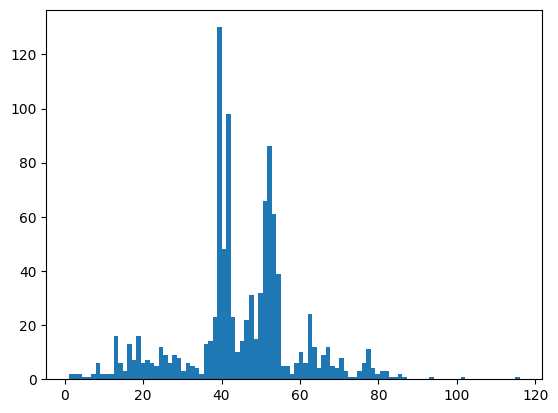

In [25]:

import matplotlib.pyplot as plt

plt.hist(lengths, bins=100);

In [22]:
pd.Series(lengths).describe()

count    1053.000000
mean       44.912631
std        14.954747
min         1.000000
25%        39.000000
50%        44.000000
75%        52.000000
max       116.000000
dtype: float64

In [ ]:
file = "/vt/md/maxes/maxes/data/BPI Challenge 2015 Municipality 4_1_all/BPIC15_4.xes"

# maxes.constants.xml_schema_xes_2023_extended.validate(file)
ET.register_namespace("", "http://www.xes-standard.org")
schema = xmlschema.XMLSchema(maxes.constants.PATH_XES_SCHEMA_2023_EXTENDED, namespace='http://www.xes-standard.org')
schema.validate(file)

In [ ]:
file = "/vt/md/maxes/maxes/data/BPI Challenge 2015 Municipality 4_1_all/BPIC15_4.xes"
# file = "/vt/md/maxes/maxes/data/test.xes"
# file = "/vt/md/maxes/maxes/data/Activities of daily living of several individuals_1_all/data/activitylog_uci_detailed_labour.xes/activitylog_uci_detailed_labour.xes"

# maxes.constants.xml_schema_xes_2023_extended.validate(file)
# ET.register_namespace("http://www.xes-standard.org/", "http://www.xes-standard.org")
# ET.register_namespace("http://www.xes-standard.org", "http://www.xes-standard.org")
# schema = xmlschema.XMLSchema(maxes.constants.PATH_XES_SCHEMA_2023_EXTENDED)
schema = xmlschema.XMLSchema(maxes.constants.PATH_XES_SCHEMA_2023_EXTENDED, namespace='http://www.xes-standard.org/')
schema.validate(file)

In [14]:
# analyzer.info["Events"]["Count per trace"]["std"].__class__
# data = {
#     ""
# }
# json.dumps(info, ensure_ascii=False, indent=4, cls=CustomJsonEncoder)



class CustomJsonEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        if isinstance(obj, np.floating):
            return float(obj)
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        if isinstance(obj, pd.Timestamp):
            return str(obj)
        if isinstance(obj, pd.Timedelta):
            return str(obj)
        return super(CustomJsonEncoder, self).default(obj)

data = analyzer.info["Events"]["Count per trace"]
print(json.dumps(data, ensure_ascii=False, indent=4, cls=CustomJsonEncoder, ignore_nan=False))

TypeError: JSONEncoder.__init__() got an unexpected keyword argument 'ignore_nan'